# Rio De Janero

![Alt Text](https://media.tenor.com/oW_vzeDVjOcAAAAC/travel-rio-de-janeiro.gif)

In [1]:
import pandas as pd
import glob
import os

In [18]:
customers_dataset = pd.read_csv("../Data/olist_customers_dataset.csv")
geolocation_dataset = pd.read_csv("../Data/olist_geolocation_dataset.csv")
order_items_dataset = pd.read_csv("../Data/olist_order_items_dataset.csv")
order_payments_dataset = pd.read_csv("../Data/olist_order_payments_dataset.csv")
order_reviews_dataset = pd.read_csv("../Data/olist_order_reviews_dataset.csv")
orders_dataset = pd.read_csv("../Data/olist_orders_dataset.csv")
products_dataset = pd.read_csv("../Data/olist_products_dataset.csv")
sellers_dataset = pd.read_csv("../Data/olist_sellers_dataset.csv")
product_category_name_translation = pd.read_csv("../Data/product_category_name_translation.csv")

#### Find duplicates rows in geolocation_dataset by `geolocation_lat` and `geolocation_lng` columns

In [28]:
duplicates = geolocation_dataset[geolocation_dataset.duplicated(subset=['geolocation_lat', 'geolocation_lng'], keep=False)]
duplicates.shape[0]

413907

In [26]:
geolocation_dataset_without_duplicates = geolocation_dataset.drop_duplicates(subset=['geolocation_lat', 'geolocation_lng'])

In [74]:
geolocation_dataset_without_duplicates_in_zip = geolocation_dataset.drop_duplicates(subset=['geolocation_zip_code_prefix'])

In [29]:
geolocation_dataset_without_duplicates.shape[0]

718463

### Nombre total de clients :

In [51]:

n_clients = customers_dataset.drop_duplicates(subset=['customer_unique_id']).shape[0]
n_clients


96096

### nombre total de commandes :

In [52]:
n_commandes =  customers_dataset.drop_duplicates(subset=['customer_id']).shape[0]
n_commandes

99441

In [57]:
customers_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [58]:
geolocation_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [75]:
merged_df = customers_dataset.merge(geolocation_dataset_without_duplicates_in_zip[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']], 
                                     left_on='customer_zip_code_prefix', 
                                     right_on='geolocation_zip_code_prefix', 
                                     how='left')
merged_df = merged_df.drop('geolocation_zip_code_prefix', axis=1)
merged_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.726853,-46.545746
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.527788,-46.660310
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.496930,-46.185352
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.987222,-47.151073
...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,-23.587901,-46.501830
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,-23.612294,-46.765787
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,-3.744128,-38.510859
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,-29.956391,-51.167614


<AxesSubplot:>

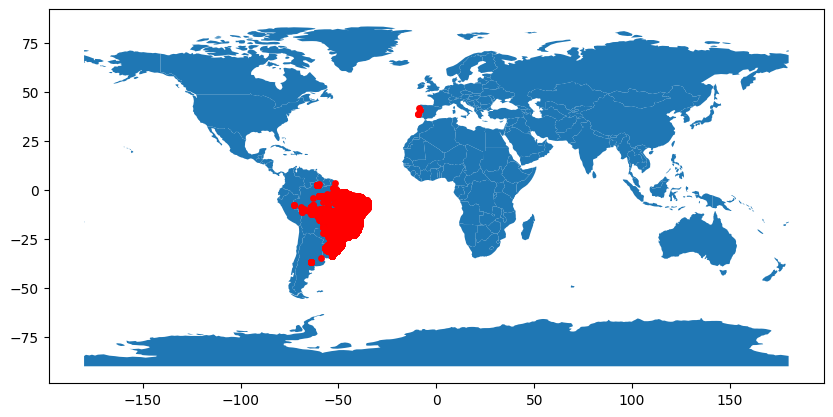

In [76]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame



geometry = [Point(xy) for xy in zip(merged_df['geolocation_lng'], merged_df['geolocation_lat'])]
gdf = GeoDataFrame(merged_df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15)

In [77]:
import pandas as pd
import folium
from shapely.geometry import Point


m = folium.Map(location=[merged_df['geolocation_lat'].mean(), merged_df['geolocation_lng'].mean()], zoom_start=10)

for i, row in merged_df.iterrows():
    folium.CircleMarker([row['geolocation_lat'], row['geolocation_lng']], radius=5, color='red', fill=True, fill_color='red').add_to(m)

m.save("map.html")

ValueError: Location values cannot contain NaNs.

In [69]:
merged_df.isna().sum()

customer_id                   0
customer_unique_id            0
customer_zip_code_prefix      0
customer_city                 0
customer_state                0
geolocation_lat             278
geolocation_lng             278
geometry                      0
dtype: int64